Chance of Sickness:

I chose to analyze covid cases to determine which neighborhood had the highest number of deaths due to infection. My dataset is all reported cases up to March 28th 2022 in Pittsburgh neighborhoods. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

cov = pd.read_csv("CovidCases.csv",usecols = ['neighborhood_municipality','infections','deaths','hospitalizations'])

cov.groupby('neighborhood_municipality').count()

,infections,deaths,hospitalizations
neighborhood_municipality,,,
Aleppo,1,1,1
Allegheny Center (Pittsburgh),1,1,1
Allegheny West (Pittsburgh),1,1,1
Allentown (Pittsburgh),1,1,1
Arlington (Pittsburgh),1,1,1
...,...,...,...
Whitehall,1,1,1
Wilkins,1,1,1
Wilkinsburg,1,1,1


In [3]:
highDeaths = cov.nlargest(20,['deaths'])

highDeaths.head(10)

,neighborhood_municipality,infections,deaths,hospitalizations
162,Ross,6471,137,349
122,Monroeville,6181,131,455
116,McCandless,5280,130,221
144,Penn Hills,8051,107,586
119,McKeesport,4260,106,438
18,Bethel Park,7059,95,269
125,Mount Lebanon,6321,89,195
164,Scott,3761,83,146
8,Baldwin Borough,5011,73,294
151,Plum,5356,70,268


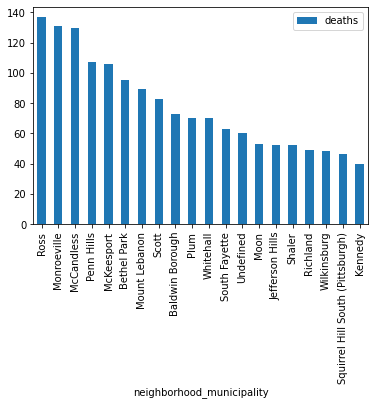

In [4]:
highDeaths.plot(x = 'neighborhood_municipality',y = 'deaths', kind = 'bar')

In [6]:
totalRisk = highDeaths['infections'] + highDeaths['hospitalizations'] + highDeaths['deaths']

highDeaths['risk_of_death'] = totalRisk

highDeaths = highDeaths.sort_values('risk_of_death',ascending = False).head(10)

highDeaths

,neighborhood_municipality,infections,deaths,hospitalizations,risk_of_death
144,Penn Hills,8051,107,586,8744
18,Bethel Park,7059,95,269,7423
162,Ross,6471,137,349,6957
122,Monroeville,6181,131,455,6767
125,Mount Lebanon,6321,89,195,6605
123,Moon,5667,53,184,5904
169,Shaler,5493,52,258,5803
151,Plum,5356,70,268,5694
116,McCandless,5280,130,221,5631
8,Baldwin Borough,5011,73,294,5378


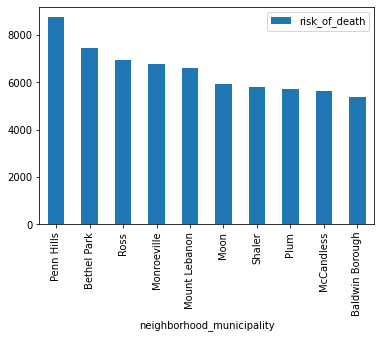

In [7]:
risk_counter = pd.DataFrame(highDeaths, columns = ['neighborhood_municipality','risk_of_death'])
risk_counter.plot(x = 'neighborhood_municipality',y= 'risk_of_death',kind = 'bar')

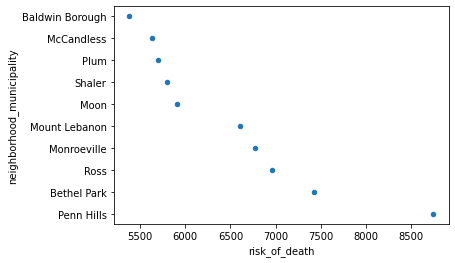

In [9]:
risk_counter.plot(x = 'risk_of_death',y= 'neighborhood_municipality',kind = 'scatter')